In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL.ImageChops import overlay
from skimage.morphology import disk, opening, skeletonize

In [86]:
"""
Reading the image
Matlab steps translated:
O = imread('test.png');
O = mean(O,3);
I = imgaussfilt(O,1);
"""
O = cv2.imread("img1.png")
I = cv2.GaussianBlur(O, (0, 0), sigmaX=1, sigmaY=1)

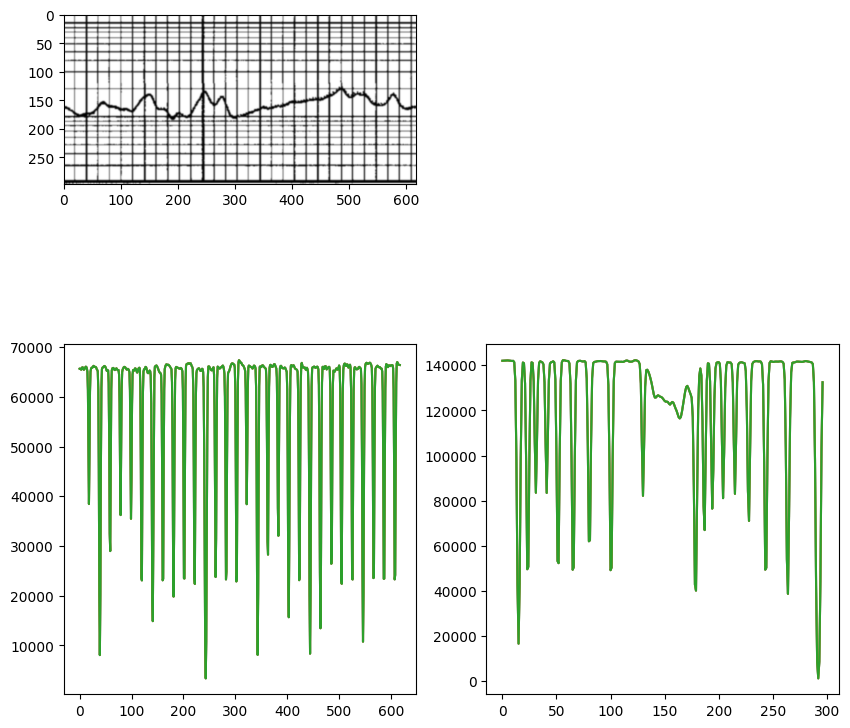

In [87]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(I, cmap="gray")
plt.axis("image")
plt.subplot(2, 2, 3)
plt.plot(np.sum(I, axis=0))
plt.axis("tight")
plt.subplot(2, 2, 4)
plt.plot(np.sum(I, axis=1))
plt.gca().set_aspect("auto")

In [88]:
#The linear algebra stuff.
#(sum(I,1) < 50000)
#(sum(I,2) < 110000)
row_mask = np.sum(I, axis=1) < 110000
col_mask = np.sum(I, axis=0) < 50000

# Combining the masks with ones
mask_combined = (row_mask[:, np.newaxis] | col_mask[np.newaxis, :])

# K = max(O,max(O(:))*(ones(size(I,1),1)*(sum(I,1) < 50000) | (sum(I,2) < 110000)*ones(1,size(I,2))));
K = np.maximum(O, np.max(O) * mask_combined)

In [89]:
# Morphological operations
se = disk(10)
J = opening(K.mean(axis=2), se)
S = skeletonize(J<128)

(np.float64(-0.5), np.float64(617.5), np.float64(296.5), np.float64(-0.5))

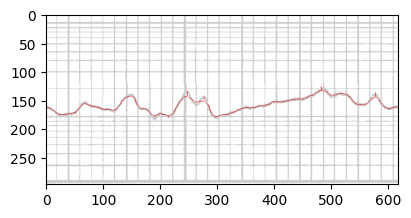

In [90]:
# Plotting again
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 4)

# Making the overlay of the skeleton on the original image
overlay = np.zeros(O.shape[:2] + (3,), dtype=np.uint8)  + 255
overlay[S] = [255, 0, 0]

plt.imshow(overlay)
plt.imshow(O, cmap="gray", alpha=0.2)
plt.axis("image")